In [2]:
from os import listdir
listdir("C:\\Users\\Or\\Olympic History")

['athlete_events.csv',
 'athlete_events_data_dictionary.csv',
 'country_definitions.csv',
 'country_definitions_data_dictionary.csv']

In [3]:
# Imports
# Data Processing Libraries
import pandas as pd
import numpy as np

# Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
original_data = pd.read_csv("C:\\Users\\Or\\Olympic History\\athlete_events.csv")

### Exploration (EDA) & Visualization

In [5]:
original_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Data Statistics

In [6]:
original_data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### Dataset Size

In [7]:
print(original_data.shape)

(271116, 15)


### Columns & Data types

In [8]:
print(original_data.dtypes)

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object


In [9]:
# Column types
binary_variables = [] # empty for now
categorical_variables = ['Sex', 'Team', 'NOC', 'Games', 'Season',
                         'City', 'Sport', 'Event', 'Medal']
numeric_variables = ['Age', 'Height', 'Weight', 'Year']

### Medals Distribution

In [10]:
original_data['Medal'].value_counts(dropna=False) # Include NaN values

NaN       231333
Gold       13372
Bronze     13295
Silver     13116
Name: Medal, dtype: int64

### Value Histograms
Simple histogram using Pandas

In [11]:
# Max Age
maxAge = original_data["Age"].max()
print(maxAge)

97.0


In [12]:
# Min Age
minAge = original_data["Age"].min()
print(minAge)

10.0


<AxesSubplot:>

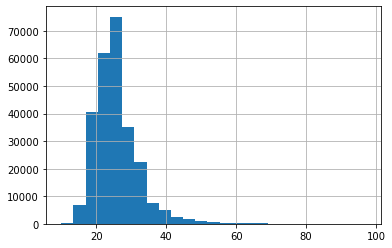

In [13]:
original_data["Age"].hist(bins=25)

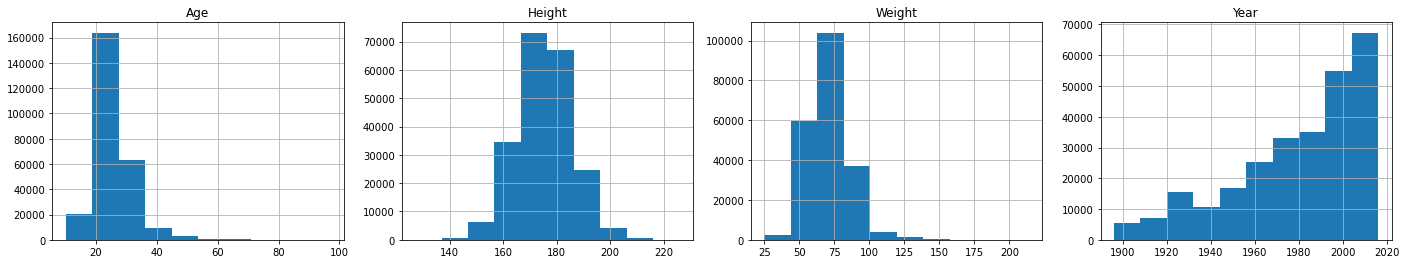

In [14]:
# Initialize a Matplotlib figures grid
fig, axes = plt.subplots(1, len(numeric_variables),figsize=(24,4))

# Generate a histogram using Pandas, for each numeric variable
for ind,var in enumerate(numeric_variables):
    original_data[var].hist(ax=axes[ind])
    axes[ind].set_title(var)

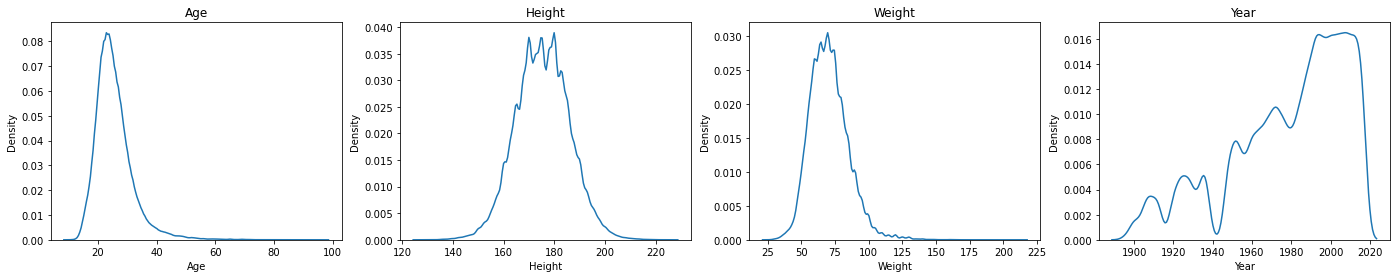

In [15]:
# Initialize a Matplotlib figures grid
fig, axes = plt.subplots(1, len(numeric_variables),figsize=(24,4))

# Generate a histogram using Pandas, for each numeric variable
for ind,var in enumerate(numeric_variables):
    sns.kdeplot(original_data[var],ax=axes[ind])
    axes[ind].set_title(var)

### Value Histograms for Categorical Variables (via Pandas and Matplotlib)

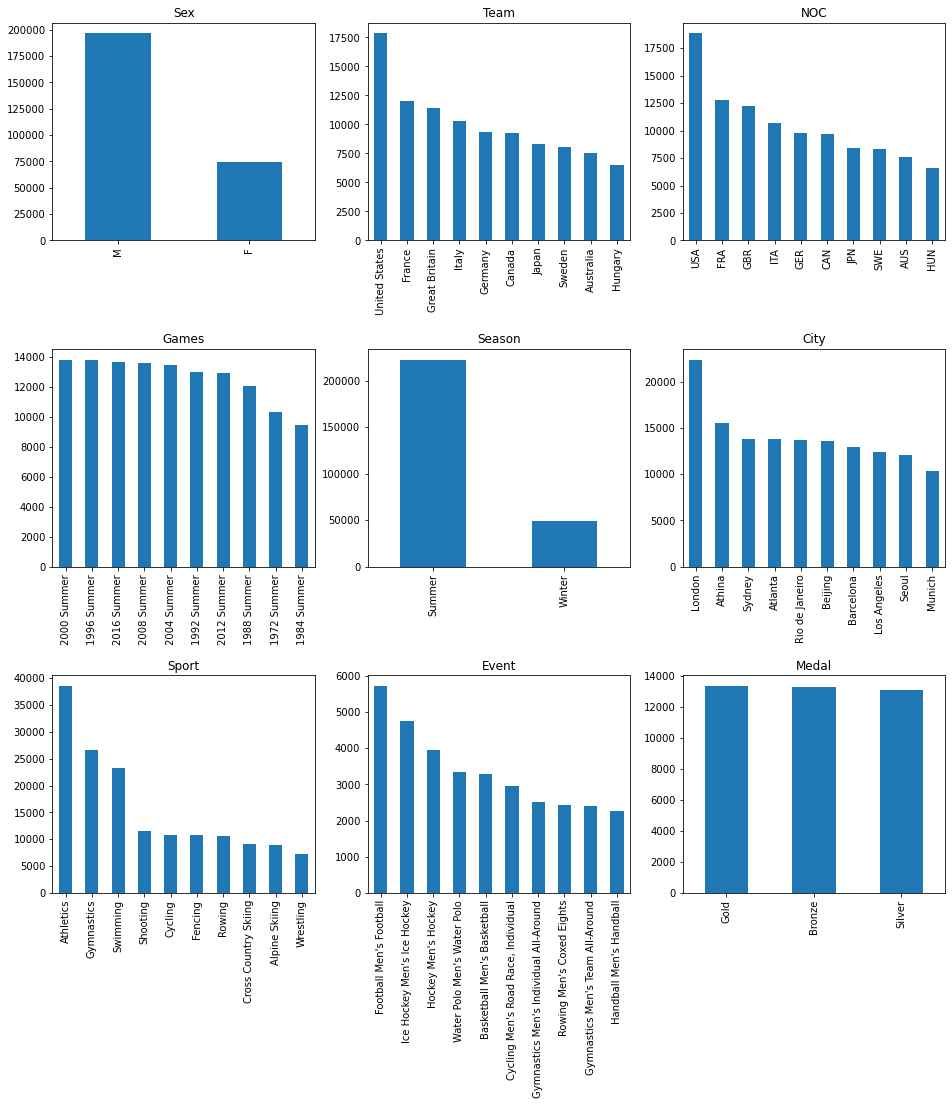

In [16]:
# Generate a figures grid:
fig, axes = plt.subplots(3,3,figsize=(16,16))
fig.subplots_adjust(hspace=0.5)

# We will create a histogram for each categorical attribute
n=len(categorical_variables)
num_rows = 3
max_bars = 10

for i, variable in enumerate(categorical_variables):
    # Calculate the current place on the grid
    r=int(i/num_rows)
    c=i%num_rows
    
    # Create the "value counts" for the first <max_bars> categories:
    u=min(original_data[variable].nunique(),max_bars)
    vc = original_data[variable].value_counts()[:u]
    
    # Plot a bar chart using Pandas
    vc.plot(kind='bar',ax=axes[r,c],title=variable)

### Countries with the Most Athletes Participated (As Pie and Bar Charts)

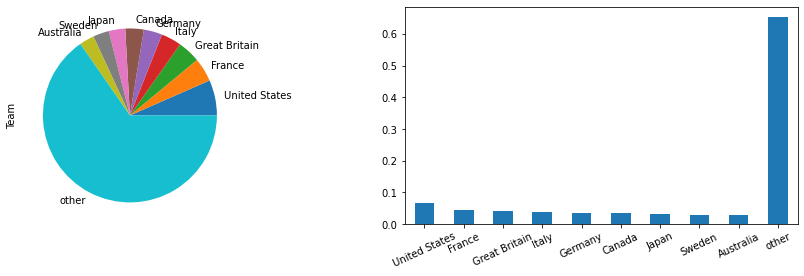

In [95]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(left=2, right=4)

s = pd.Series(original_data["Team"])
prob = s.value_counts(normalize=True)
threshold = 0.025
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob

prob.plot(kind='pie', ax=axes[0])
plt.xticks(rotation=50)

prob.plot(kind='bar', ax=axes[1])
plt.xticks(rotation=25)

plt.show()

### Pie Charts - Countries with the Most Medals

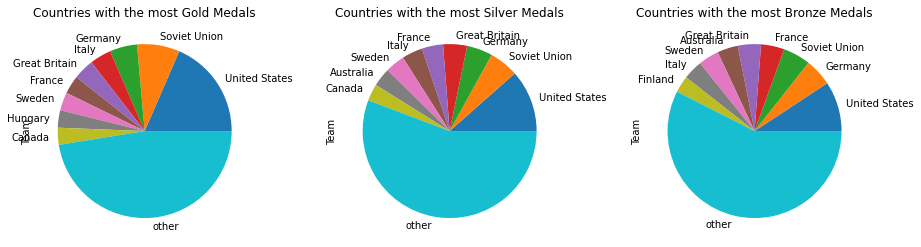

In [93]:
s = [pd.Series(original_data[original_data['Medal'] == 'Gold'].Team),
     pd.Series(original_data[original_data['Medal'] == 'Silver'].Team),
     pd.Series(original_data[original_data['Medal'] == 'Bronze'].Team)]

titles = ['Gold', 'Silver', 'Bronze']
fig, axes = plt.subplots(1, 3)

plt.subplots_adjust(left=2, right=4)

for i in range(len(s)):
    prob = s[i].value_counts(normalize=True)
    threshold = 0.031
    mask = prob > threshold
    tail_prob = prob.loc[~mask].sum()
    prob = prob.loc[mask]
    prob['other'] = tail_prob

    prob.plot(kind='pie', ax=axes[i], title='Countries with the most ' + titles[i] + ' Medals')
    plt.xticks(rotation=25)

plt.show()

### Comparative Visualizations Using Seaborn

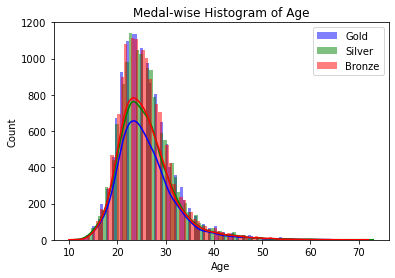

In [18]:
gold_medals   = original_data[original_data['Medal'] == 'Gold']
silver_medals = original_data[original_data['Medal'] == 'Silver']
bronze_medals = original_data[original_data['Medal'] == 'Bronze']

# First we create the figure using Matplotlib
fig,ax=plt.subplots()

ageRange = int(maxAge - minAge)

# Create three histograms using Seaborn:
sns.histplot(gold_medals.Age, bins = ageRange, kde = True, label = "Gold", ax=ax, color='b', edgecolor='k', linewidth=0)
sns.histplot(silver_medals.Age, bins = ageRange, kde = True, label = "Silver", ax=ax, color='g', edgecolor='k', linewidth=0)
sns.histplot(bronze_medals.Age, bins = ageRange, kde = True, label = "Bronze", ax=ax, color='r', edgecolor='k', linewidth=0)

# Don't forget to make titles for the figure and axes
plt.title('Medal-wise Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(loc="upper right")

### Correlations

In [19]:
original_data.corr(method='spearman')

,ID,Age,Height,Weight,Year
ID,1.000000,-0.002076,-0.010786,-0.012093,0.013191
Age,-0.002076,1.000000,0.145411,0.216990,0.000777
Height,-0.010786,0.145411,1.000000,0.827131,0.050298
Weight,-0.012093,0.216990,0.827131,1.000000,0.009067
Year,0.013191,0.000777,0.050298,0.009067,1.000000


<AxesSubplot:>

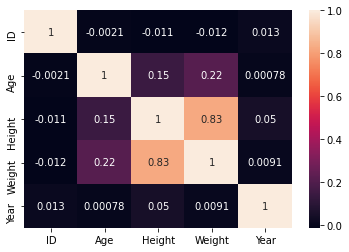

In [20]:
sns.heatmap(original_data.corr(method='spearman'),annot=True)

Notice the correlation between Height and Weight (0.83)

### Joint Distribution Plot - Weight and Height among Gold Medal Winners

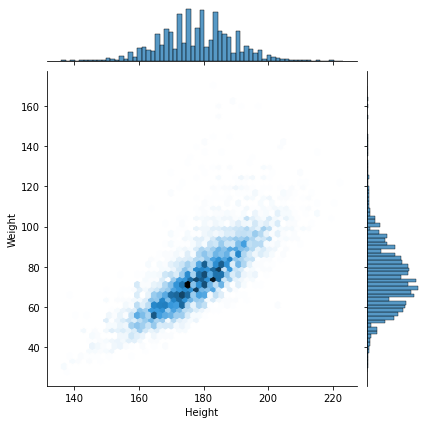

In [29]:
sns.jointplot(x='Height', y='Weight', data=original_data[original_data['Medal'] == 'Gold'], kind='hex')

### Height and Weight Graph, Separated by Gender

Text(0.5, 1.0, 'Height and Weight, Separated by Gender')

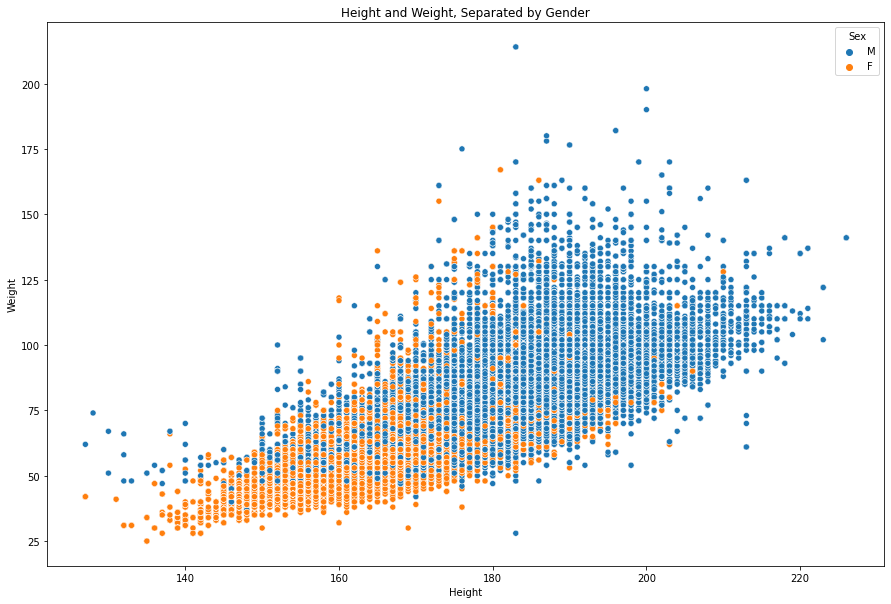

In [101]:
plt.figure(figsize = (15,10))
sns.scatterplot(x = 'Height', y = 'Weight', data = original_data, hue = 'Sex')
plt.title("Height and Weight, Separated by Gender")